In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, sin
from scipy.integrate import solve_ivp

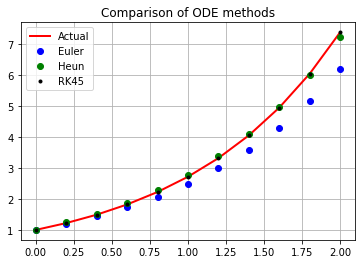

In [2]:
h = .2
x = np.linspace(0,2, num=int(2/.2)+1)
y=exp(x)

def m_y(t, x):
    return x

yv3 = solve_ivp(m_y, (0,2), (1,),  method='RK45', t_eval = x, max_step=h).y[0]
xv = []
yv1 = []
yv2 = []

y0 = 1
xv.append(0)
yv1.append(y0)
yv2.append(y0)
ya0 = yb0 = y0
for ii in np.arange(h,2+h,h):
    ya1 = ya0 + h * ya0
    yb1 = yb0 + h * (yb0 + h)
    xv.append(ii)
    yv1.append(ya1)
    yv2.append(yb1)
    ya0, yb0 = ya1, yb1


# plot results
plt.plot(x,y,'r-',linewidth=2, label='Actual')
plt.plot(xv, yv1,'bo',linewidth=2, label='Euler')
plt.plot(xv, yv2,'go',linewidth=2, label='Heun')
plt.plot(x, yv3,'k.',linewidth=2, label='RK45')

plt.grid()
plt.title("Comparison of ODE methods")
plt.legend()
plt.show()

Comparison of SciPy ODE methods

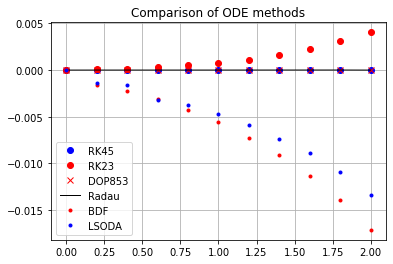

In [8]:
h = .2
x = np.linspace(0,2, num=int(2/.2)+1)
y=exp(x)

methods = ('RK45','RK23', 'DOP853','Radau','BDF', 'LSODA')
colours = ('bo','ro','rx','k-','r.','b.')
def m_y(t, x):
    return x

results = []
for c, meth in zip(colours, methods):
    y = solve_ivp(m_y, (0,2), (1,),  method=meth, t_eval = x, max_step=h).y[0]
    y2 = exp(x)-y
    plt.plot(x,y2,c, linewidth=1, label=meth)


plt.title("Comparison of ODE methods")
plt.legend()
ax = plt.gca()
ax.grid()
plt.show()

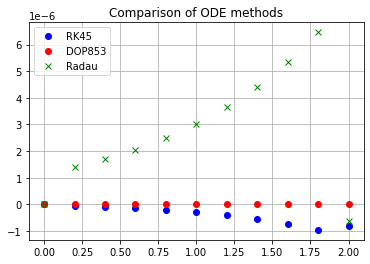

In [9]:
h = .2
x = np.linspace(0,2, num=int(2/.2)+1)
y=exp(x)

methods = ('RK45', 'DOP853','Radau')
colours = ('bo','ro','gx')
def m_y(t, x):
    return x

results = []
for c, meth in zip(colours, methods):
    y = solve_ivp(m_y, (0,2), (1,),  method=meth, t_eval = x, max_step=h).y[0]
    y2 = exp(x)-y
    plt.plot(x,y2,c, linewidth=1, label=meth)


plt.title("Comparison of ODE methods")
ax = plt.gca()
plt.grid()
plt.legend()
plt.show()

Now look at y'' = -y for which we expect solutions of sin(x) or cos(x).
We set this up as a coupled system of first order equations as:
y' = -u and u' = y

In [5]:
def m_y(t,x):
    # x is a vector for (u, y)
    y = (x[1], -x[0])
    #print(x,y)
    return y


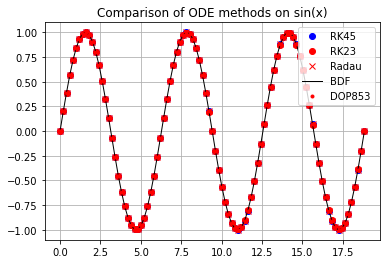

In [6]:
h = .2
xdist = 6*np.pi
x = np.linspace(0,xdist, num=int(xdist/h)+1)
y=exp(x)

methods = ('RK45','RK23', 'Radau','BDF', 'DOP853')
colours = ('bo','ro','rx','k-','r.','b.')


for c, meth in zip(colours, methods):
    y = solve_ivp(m_y, (0,6*np.pi), (-1,0),  method=meth, t_eval = x, max_step=h).y[1]
    #y2 = exp(x)-y
    plt.plot(x,y,c, linewidth=1, label=meth)
    #print(y)


plt.title("Comparison of ODE methods on sin(x)")
plt.legend()
plt.grid()
plt.show()

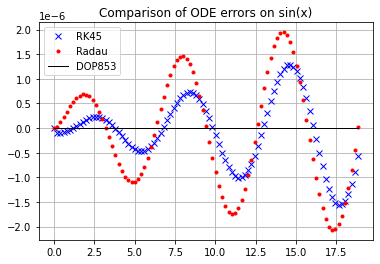

In [7]:
h = .2
xdist = 6*np.pi
x = np.linspace(0,xdist, num=int(xdist/h)+1)
y=exp(x)

methods = ('RK45', 'Radau', 'DOP853')
colours = ('bx','r.','k-','r.','b.')


for c, meth in zip(colours, methods):
    y = solve_ivp(m_y, (0,6*np.pi), (-1,0),  method=meth, t_eval = x, max_step=h).y[1]
    y2 = sin(x)-y
    plt.plot(x,y2,c, linewidth=1, label=meth)
    #print(y)


plt.title("Comparison of ODE errors on sin(x)")
plt.legend()
plt.grid()
plt.show()

So in conclusion, with the above methods, the errors are very small but they do eventually get amplified.